## Homework 2
### Student Details
**Name:** Atul Parida<br>
**Student ID:** 1006184<br>
**Course ID** 50.007 Machine Learning (Summer 2023)<br>

### Instructions to run
Press *Run All* to run all cells for the given Jupyter notebook. This notebook was compiled using the Python 3.9.13 kernel.

### Common Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Question 2

In [18]:
### Import Data
import PIL as pil

data_path = os.path.join(os.path.curdir, 'HW2_data', '2', 'hw2_img.jpg')

# import image from data - format: rows x columns x RGB
img = pil.Image.open(data_path)
img = np.array(img)

# convert into 2D array - format: pixels x RGB
num_pixels = img.shape[0] * img.shape[1]
reshaped_img = img.reshape(num_pixels, 3)


In [19]:
class KMeans:
    def __init__(self, k, random_state=None):
        self.k = k
        self.random_state = random_state
        self.centroids = None
        self.cluster_labels = None
        self.cluster_counts = None

    def fit(self, X):
        np.random.seed(self.random_state)
        n_samples, _ = X.shape

        # Randomly initialize centroids
        random_indices = np.random.choice(n_samples, size=self.k, replace=False)
        self.centroids = X[random_indices]

        # Iterate until convergence
        prev_cluster_labels = None
        while True:
            # Assign each sample to the nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
            self.cluster_labels = np.argmin(distances, axis=1)

            # Check for convergence
            if np.array_equal(self.cluster_labels, prev_cluster_labels):
                break

            # Update centroids
            self.centroids = np.array([X[self.cluster_labels == i].mean(axis=0) for i in range(self.k)])

            prev_cluster_labels = self.cluster_labels

        # Calculate cluster counts
        self.cluster_counts = np.bincount(self.cluster_labels)


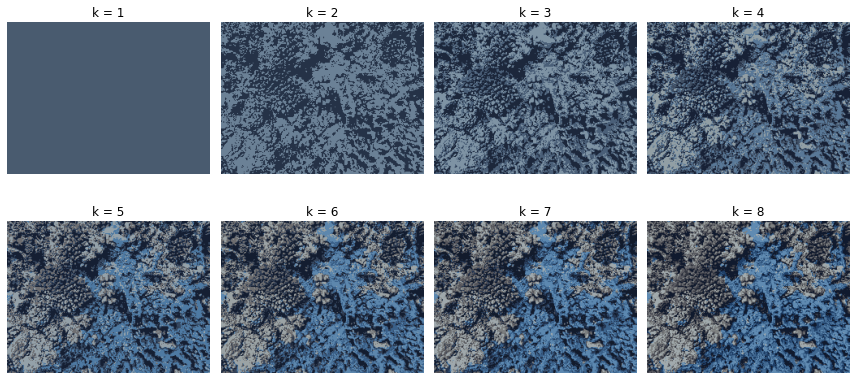

Number of clusters for k = 1: 1
Final centroids for k = 1:
[[ 73.34134759  91.12017112 111.98645989]]
Number of pixels associated with each cluster for k = 1:
[46750]
------------------------------
Number of clusters for k = 2: 2
Final centroids for k = 2:
[[107.35063855 129.59195474 150.06476975]
 [ 37.34340188  50.39879354  71.681564  ]]
Number of pixels associated with each cluster for k = 2:
[24039 22711]
------------------------------
Number of clusters for k = 3: 3
Final centroids for k = 3:
[[ 74.49994061  95.59514194 120.20049887]
 [ 28.24325973  39.65225082  59.98633646]
 [126.59106377 147.96404794 164.81839029]]
Number of pixels associated with each cluster for k = 3:
[16838 16394 13518]
------------------------------
Number of clusters for k = 4: 4
Final centroids for k = 4:
[[ 89.62869822 120.8239645  151.11211461]
 [ 23.08816545  33.9842972   54.11926465]
 [146.93486935 159.04878363 165.36710001]
 [ 63.79483259  78.63400092  99.61924782]]
Number of pixels associated with e

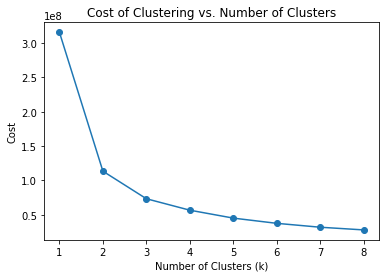

In [20]:
# Run KMeans for k = 1 to k = 8 on the image
k_values = range(1, 9)
results = []

for k in k_values:
    kmeans = KMeans(k=k, random_state=42)
    kmeans.fit(reshaped_img)

    centroids = kmeans.centroids
    cluster_labels = kmeans.cluster_labels
    cluster_counts = kmeans.cluster_counts

    results.append((k, centroids, cluster_labels, cluster_counts))

# Visualize the results
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i, (k, centroids, cluster_labels, _) in enumerate(results):
    clustered_image_array = centroids[cluster_labels]
    clustered_image = clustered_image_array.reshape(img.shape).astype(np.uint8)

    axes[i].imshow(clustered_image)
    axes[i].set_title(f"k = {k}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Print the requested information for each case
for k, centroids, cluster_labels, cluster_counts in results:
    print(f"Number of clusters for k = {k}: {len(np.unique(cluster_labels))}")
    print(f"Final centroids for k = {k}:\n{centroids}")
    print(f"Number of pixels associated with each cluster for k = {k}:\n{cluster_counts}")
    print("-" * 30)

# Plot the cost of clustering as a function of k
costs = [np.sum((reshaped_img - centroids[labels]) ** 2) for _, centroids, labels, _ in results]
plt.plot(k_values, costs, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.title("Cost of Clustering vs. Number of Clusters")
plt.show()


### Question 5

0 10.0


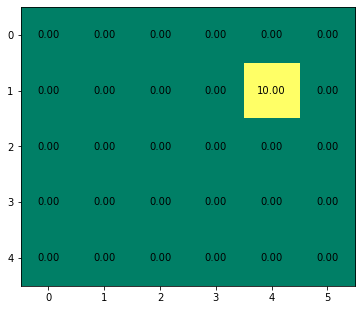

1 5.0


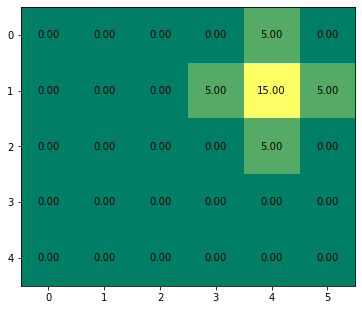

2 2.5


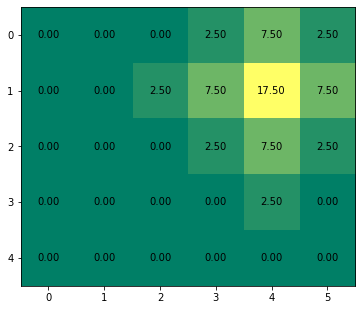

3 1.25


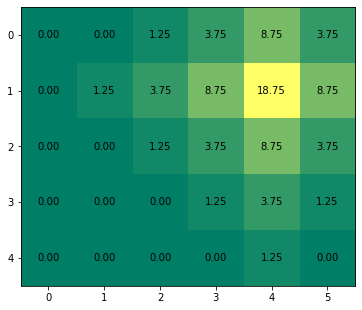

4 0.625


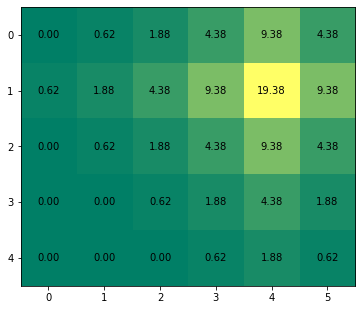

5 0.3125


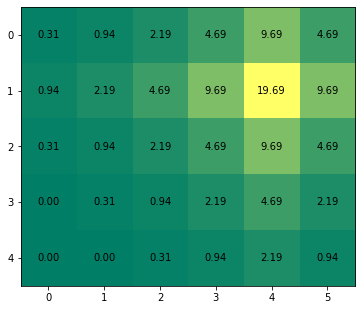

6 0.15625


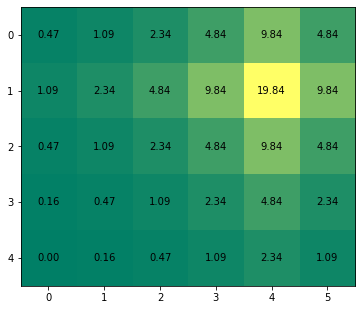

7 0.078125


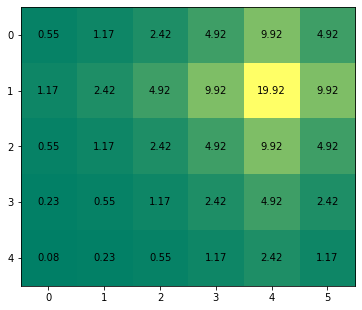

8 0.0390625


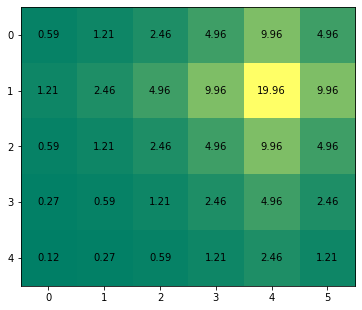

9 0.01953125


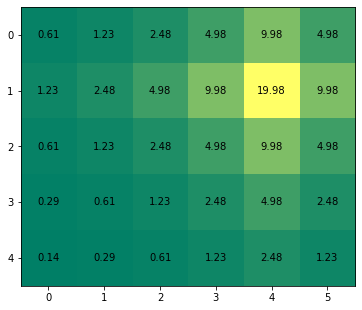

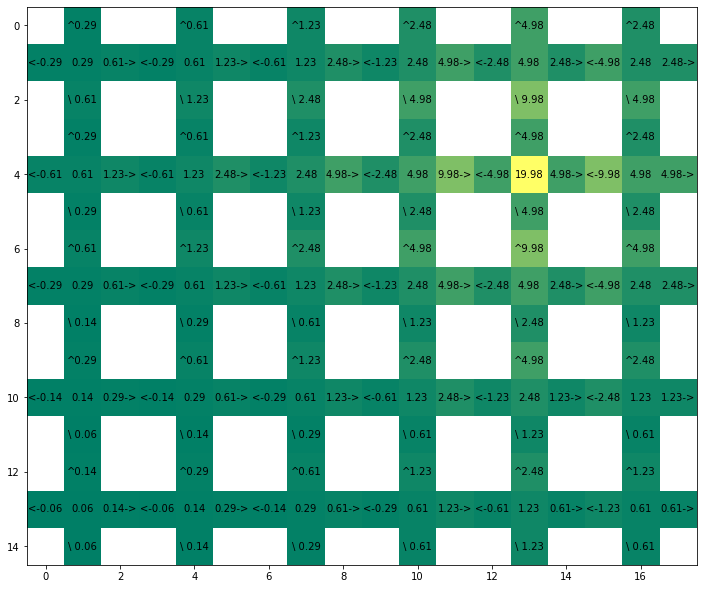

In [21]:
import matplotlib.pyplot as plt

import numpy as np


class simpleprob1():
  # all actions into one single state, the keystate, give a high reward

  def __init__(self,numh,numw, keystate):
  
    self.numh=numh
    self.numw=numw

    if (keystate[0]<0) or (keystate[0]>=self.numh):
      print('illegal')
      exit()
    if (keystate[1]<0) or (keystate[1]>=self.numw):
      print('illegal')
      exit()

    #state space: set of tuples (h,w) 0<=h<=numh, 0<=w<=numw
    self.statespace=[ (h,w) for h in range(self.numh) for w in range(self.numw) ]
 
    self.statespace2index=dict()
    for i,s in enumerate(self.statespace):
      self.statespace2index[s]=i



    self.actions=['stay','right','down','left','up']
    self.actdict2index=dict()
    for i,a in enumerate(self.actions):
      self.actdict2index[a]=i


    self.highrewardstate=keystate
    self.rewardtogothere=10.


  def transition_deterministic(self,oldstate_index,action):
    #P(s'|s,a) is 1 for one specific s'
    if action not in self.actions:
      print('illegal')
      exit()


    oldstate=self.statespace[oldstate_index]
    
    # all deterministic

    if self.actdict2index[action]==0:
      newstate=list(oldstate)

    elif self.actdict2index[action]==1:
      newstate=list(oldstate)
      newstate[1]=min(self.numw-1,newstate[1]+1)


    elif self.actdict2index[action]==2:
      newstate=list(oldstate)
      newstate[0]=min(self.numh-1,newstate[0]+1)


    elif self.actdict2index[action]==3:
      newstate=list(oldstate)
      newstate[1]=max(0,newstate[1]-1)


    elif self.actdict2index[action]==4:
      newstate=list(oldstate)
      newstate[0]=max(0,newstate[0]-1)

    #can return probs or set of new states and probabilities
    return self.statespace2index[tuple(newstate)]
  

  def reward(self,oldstate_index,action,newstate_index):
    #P(R|s,a)
    onlygoalcounts=True

    if False==onlygoalcounts: #one gets  a reward when one jumps into the golden state or stays there
      r=self.tmpreward1(oldstate_index, action, newstate_index)
    else: #one gets only a reward when one stays in the golden state
      r=self.tmpreward2(oldstate_index, action, newstate_index) 

    return r
  
  def tmpreward1(self,oldstate_index,action,newstate_index):

    newstate=self.statespace[newstate_index]
    if (newstate[0]==self.highrewardstate[0]) and (newstate[1]==self.highrewardstate[1]):
      return self.rewardtogothere
    else:
      return 0

  def tmpreward2(self,oldstate_index,action,newstate_index):

    newstate=self.statespace[newstate_index]
    if (newstate[0]==self.highrewardstate[0]) and (newstate[1]==self.highrewardstate[1]) and (action=='stay'):
      return self.rewardtogothere
    else:
      return 0




def plotqvalstable(qvals, simpleprob_instance, block):
    plt.ion()

    offsets = [[1, 1], [1, 2], [2, 1], [1, 0], [0, 1]]
    symbols = ['o', '->', '\ ', '<-', '^']

    mh = simpleprob_instance.numh
    mw = simpleprob_instance.numw

    plotvals = -np.ones((3 * mh, 3 * mw))

    for i in range(len(simpleprob_instance.statespace)):
        h = simpleprob_instance.statespace[i][0]
        w = simpleprob_instance.statespace[i][1]

        for c in range(len(simpleprob_instance.actions)):
            plotvals[3 * h + offsets[c][0], 3 * w + offsets[c][1]] = qvals[i, c]

    plotvals = np.ma.masked_where(plotvals < 0, plotvals)

    fig, (ax0) = plt.subplots(1, 1, figsize=(12, 12))  # Adjust the figsize as per your preference

    ax0.imshow(plotvals, cmap=plt.get_cmap('summer'), interpolation='nearest')

    for i in range(len(simpleprob_instance.statespace)):
        h = simpleprob_instance.statespace[i][0]
        w = simpleprob_instance.statespace[i][1]

        for c in range(len(simpleprob_instance.actions)):
            if c == 0:
                printstr = "{:.2f}".format(qvals[i, c])
            elif c == 1:
                printstr = "{:.2f}".format(qvals[i, c]) + symbols[c]
            elif c == 2:
                printstr = symbols[c] + "{:.2f}".format(qvals[i, c])
            elif c == 3:
                printstr = symbols[c] + "{:.2f}".format(qvals[i, c])
            elif c == 4:
                printstr = symbols[c] + "{:.2f}".format(qvals[i, c])

            ax0.text(3 * w + offsets[c][1], 3 * h + offsets[c][0], printstr,
                     ha="center", va="center", color="k")

    plt.draw()
    plt.pause(0.01)
    if block:
        input("Press [enter] to continue.")




def plotonlyvalstable2(qvals, simpleprob_instance, figsize=(6, 6), block=True):
    plt.figure(figsize=figsize)

    mh = simpleprob_instance.numh
    mw = simpleprob_instance.numw

    plotvals = -np.ones((mh, mw))
    for i in range(len(simpleprob_instance.statespace)):
        h = simpleprob_instance.statespace[i][0]
        w = simpleprob_instance.statespace[i][1]
        for c in range(len(simpleprob_instance.actions)):
            plotvals[h, w] = np.max(qvals[i, :])

    plotvals = np.ma.masked_where(plotvals < 0, plotvals)

    plt.imshow(plotvals, cmap=plt.get_cmap('summer'), interpolation='nearest')

    for h in range(mh):
        for w in range(mw):
            printstr = "{:.2f}".format(plotvals[h, w])
            plt.text(w, h, printstr, ha="center", va="center", color="k")

    plt.show(block=block)
    if block:
        input("Press [enter] to continue.")






def q_value_iteration(problemclass, gamma, delta, showeveryiteration):
    numactions = len(problemclass.actions)
    numstates = len(problemclass.statespace)

    qsa = np.zeros((numstates, numactions))
    values = np.zeros(numstates)

    converged = False
    count = 0
    while not converged:
        nextqsa = np.zeros((numstates, numactions))
        nextvalues = np.zeros(numstates)

        for s in range(numstates):
            for a in range(numactions):
                nextstate = problemclass.transition_deterministic(s, problemclass.actions[a])
                reward = problemclass.reward(s, problemclass.actions[a], nextstate)

                nextqsa[s, a] = reward + gamma * np.max(qsa[nextstate])
                nextvalues[s] = np.max(nextqsa[s])

        diff = np.max(np.abs(nextvalues - values))

        print(count, diff)
        if diff < delta:
            converged = True

        qsa = nextqsa
        values = nextvalues

        if showeveryiteration:
            plotonlyvalstable2(qsa, problemclass, block=True)

        count += 1

    return values, qsa



    


def runmdp():
    plotbig = True
    showeveryiteration = True

    mdp = simpleprob1(5, 6, keystate=[1, 4])
    values, qsa = q_value_iteration(mdp, gamma=0.5, delta=3e-2, showeveryiteration=showeveryiteration)

    if not plotbig:
        if not showeveryiteration:
            plotonlyvalstable(qsa, mdp, block=False)
    else:
        plotqvalstable(qsa, mdp, block=False)

    input("Press [enter] to continue.")

if __name__ == '__main__':
    runmdp()


